In [2]:
import Pkg; Pkg.activate(joinpath(@__DIR__,"..")); Pkg.instantiate();
using LinearAlgebra
using ForwardDiff
if !@isdefined autograder
    using Plots
end
using Test
include(joinpath(@__DIR__,"utils.jl"))

  Activating environment at `~/devel/optimal_control/HW0/Project.toml`


matrix_isapprox (generic function with 1 method)

# Q2: Newton's Method (3 pts)

## Part (a): Newton's method in 1 dimension (1pt)
First let's look at a nonlinear function, and label where this function is equal to 0 (a root of the function).

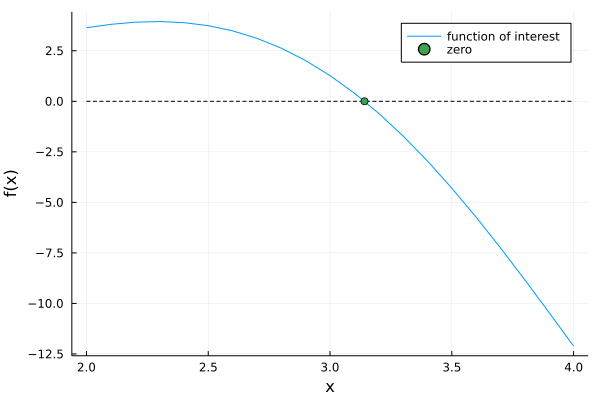

In [3]:
if !@isdefined autograder
    let 
        x = 2:0.1:4;
        y = sin.(x) .* x.^2
        plot(x,y,label = "function of interest")
        plot!(x,0*x,linestyle = :dash, color = :black,label = "")
        xlabel!("x")
        ylabel!("f(x)")
        scatter!([pi],[0],label = "zero")
    end
end

We are now going to use Newton's method to numerically evaluate the argument $x$ where this function is equal to zero. To make this more general, let's define a residual function,
$$ r(x) = \sin(x)x^2. $$
We want to drive this residual function to be zero (aka find a root to $r(x)$). To do this, we start with an initial guess at $x_k$, and approximate our residual function with a first-order Taylor expansion:
$$ r(x_k + \Delta x) \approx r(x_k) + \bigg[ \frac{\partial r}{\partial x}\bigg\rvert_{x_k} \bigg] \Delta x. $$ 
We now want to find the root of this linear approximation. In other words, we want to find a $\Delta x$ such that $r(x_k + \Delta x) = 0$. To do this, we simply re-arrange:
$$ \Delta x = -\bigg[ \frac{\partial r}{\partial x}\bigg\rvert_{x_k} \bigg]^{-1}r(x_k). $$ 
We can now increment our estimate of the root with the following:
$$ x_{k+1} = x_k + \Delta x$$
We have now described one step of Netwon's method. We started with an initial point, linearized the residual function, and solved for the $\Delta x$ that drove this linear approximation to zero. We keep taking Newton steps until $r(x_k)$ is close enough to zero for our purposes (usually not hard to drive below 1e-10). 


Julia tip: `x=A\b` solves linear systems of the form $Ax = b$ whether $A$ is a matrix or a scalar. 

2a: Test Failed at In[4]:33
  Expression: norm(r(X[end])) < 1.0e-7
   Evaluated: NaN < 1.0e-7
Stacktrace:

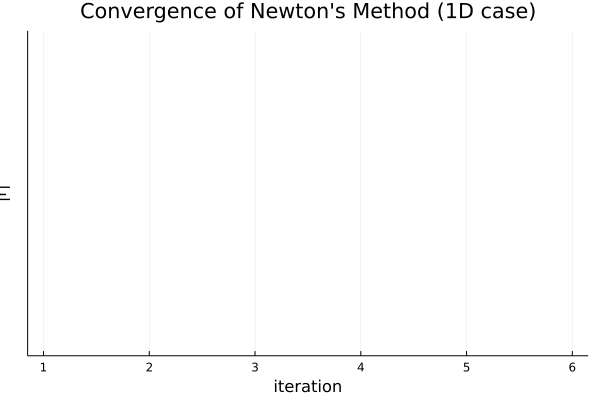


 [1] macro expansion
   @ In[4]:33 [inlined]
 [2] macro expansion
   @ /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Test/src/Test.jl:1151 [inlined]
 [3] top-level scope
   @ In[4]:3
Test Summary: | Fail  Total
2a            |    1      1


LoadError: [91mSome tests did not pass: 0 passed, 1 failed, 0 errored, 0 broken.[39m

In [4]:
@testset "2a" begin # POINTS = 1
    # residual function 
    r(_x) = sin(_x)*_x^2
    
    # vectors for storing the x_k's and r(x_k)'s
    X = NaN*ones(10)
    R = NaN*ones(10)
    
    # initial point NOTE: Newton's method always needs an initial point.
    X[1] = 2.8
    R[1] = r(X[1])
    
    # TODO: use Newton's method to find the x such that r(x) = 0 
    # store x values in X, R values in R 
    # hint: R[i] = r(X[i]) at each iteration
    # You can exit your loop when the norm of the residual is < 1e-10
    
    ## SOLUTION
    # main loop for Newton's method
    for k = 1:9
        
        # TODO: use your newton_step function to take a step, then check convergence
        # store x values in X, and store the residuals in R 
        # hint: R[i] = r(X[i])
        
    end
        
    # TODO: trim the NaN's from your X and R (here I trimmed to the first 6) 
    R = R[1:6]
    X = X[1:6]
    
    # tests
    @test norm(r(X[end]))<1e-7 #  POINTS = 1
    
    # plotting
    if !@isdefined autograder
        display(plot(norm.(R),yaxis=:log,ylabel = "|r|",xlabel = "iteration",
             yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
             title = "Convergence of Newton's Method (1D case)",label = ""))
    end
    
end

## Part (b): Newton's method in multiple variables (1 pt)
We are now going to use Newton's method to solve for the zero of a multivariate function.

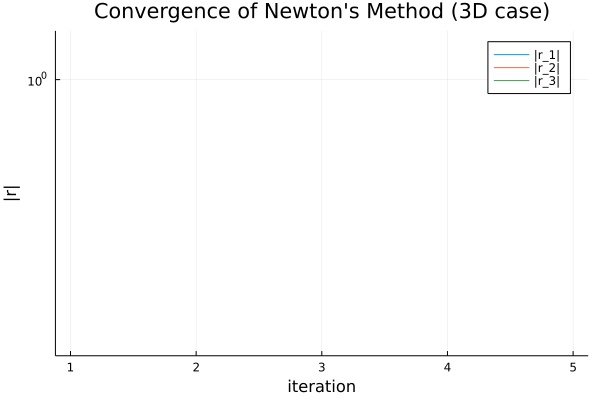

2b: Test Failed at In[5]:35
  Expression: norm(r(X[end])) < 1.0e-7
   Evaluated: NaN < 1.0e-7
Stacktrace:
 [1] macro expansion
   @ In[5]:35 [inlined]
 [2] macro expansion
   @ /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Test/src/Test.jl:1151 [inlined]
 [3] top-level scope
   @ In[5]:3
Test Summary: | Fail  Total
2b            |    1      1


LoadError: [91mSome tests did not pass: 0 passed, 1 failed, 0 errored, 0 broken.[39m

In [5]:
@testset "2b" begin # POINTS = 1
    # residual function 
    r(x) = [sin(x[3] + 0.3)*cos(x[2]- 0.2) - 0.3*x[1];
            cos(x[1]) + sin(x[2]) + tan(x[3]);
            3*x[1] + 0.1*x[2]^3]
    
    # vectors for storing the x_k's and r(x_k)'s
    X = NaN*[zeros(3) for i = 1:10]
    R = NaN*[zeros(3) for i = 1:10]
    
    # initial point NOTE: Newton's method always needs an initial point.
    X[1] = [.1;.1;0.1]
    R[1] = r(X[1])
    
    # TODO: use Newton's Method again to find x st r(x) = zeros(3)
    # You can exit your loop when the norm of the residual is < 1e-10
    
    ## Solution 
    # main loop 
    for k = 1:9
        
        # TODO: use your newton_step function to take a step, then check convergence
        # store x values in X, and store the residuals in R 
        # hint: R[i] = r(X[i])
        
        
    end
        
    # trim the NaN's away (you can change this number if you need to, but you shouldn't have to )
    R = R[1:5]    
    X = X[1:5]
    Rp = [[abs(R[i][ii]) for i = 1:length(R)] for ii = 1:3] # this gets abs of each term at each iteration
    
    # tests 
    @test norm(r(X[end]))<1e-7 # POINTS = 1
    
    # convergence plotting 
    if !@isdefined autograder
        plot(Rp[1],yaxis=:log,ylabel = "|r|",xlabel = "iteration",
             yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
             title = "Convergence of Newton's Method (3D case)",label = "|r_1|")
        plot!(Rp[2],label = "|r_2|")
        display(plot!(Rp[3],label = "|r_3|"))
    end

end

## Part (c): Newtons method in optimization (1 pt)
Now let's look at how we can use Newton's method in numerical optimization. Let's start by plotting a cost function $f(x)$, where $x\in \mathbb{R}^2$.

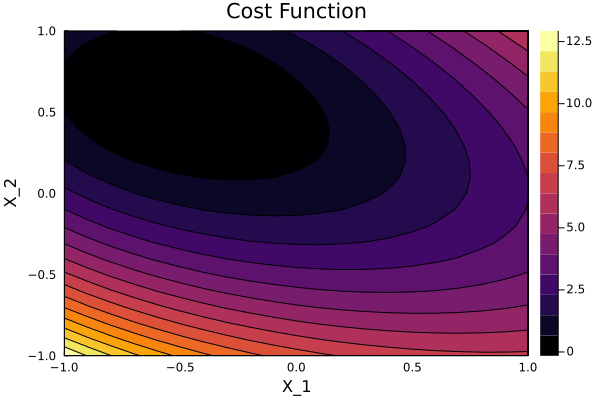

In [6]:
let
    Q = [1.65539  2.89376; 2.89376  6.51521];
    q = [2;-3]
    f(x) = 0.5*x'*Q*x + q'*x + exp(-1.3*x[1] + 0.3*x[2]^2) # cost function 
    contour(-1:.1:1,-1:.1:1, (x1,x2)-> f([x1;x2]),title = "Cost Function",
            xlabel = "X_1", ylabel = "X_2",fill = true)
end

To find the minimum for this cost function $f(x)$, let's write the KKT conditions for optimality:


$$ \nabla f(x) = 0 \quad \quad \text{stationarity}, $$


which we see is just another rootfinding problem. We are now going to use Newton's method on the KKT conditions to find the $x$ in which $\nabla f(x) = 0$.  

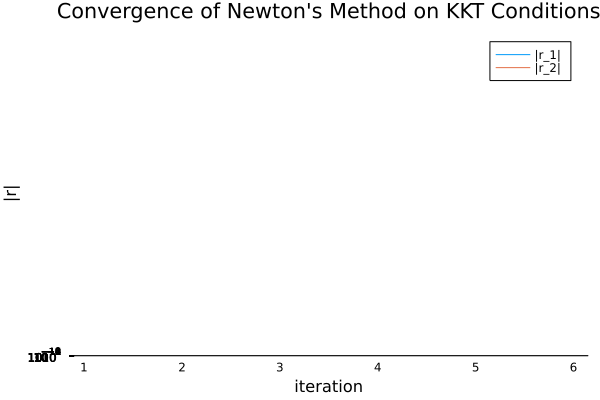

2c: Test Failed at In[7]:43
  Expression: norm(r(X[end])) < 1.0e-7
   Evaluated: NaN < 1.0e-7
Stacktrace:
 [1] macro expansion
   @ In[7]:43 [inlined]
 [2] macro expansion
   @ /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Test/src/Test.jl:1151 [inlined]
 [3] top-level scope
   @ In[7]:2
Test Summary: | Fail  Total
2c            |    1      1


GKS: Possible loss of precision in routine SET_WINDOW


LoadError: [91mSome tests did not pass: 0 passed, 1 failed, 0 errored, 0 broken.[39m

In [7]:
@testset "2c" begin            # POINTS = 1
    Q = [1.65539  2.89376; 2.89376  6.51521];
    q = [2;-3]
    f(x) = 0.5*x'*Q*x + q'*x + exp(-1.3*x[1] + 0.3*x[2]^2)
    
    function kkt_conditions(x)
        
        # TODO: return the stationarity condition for the cost function f (∇f(x))
        
        return NaN*zeros(2)
    end
    
    # the residual function we are driving to zero 
    r(x) = kkt_conditions(x)
    
    # vectors for storing the x_k's and r(x_k)'s
    X = NaN*[zeros(2) for i = 1:10]
    R = NaN*[zeros(2) for i = 1:10]
    
    # initial point NOTE: Newton's method always needs an initial point.
    X[1] = [-0.9512129986081451, 0.8061342694354091]
    R[1] = r(X[1])
    
    # TODO: use Newton's Method to find x st r(x) = zeros(3)
    # You can exit your loop when the norm of the residual is < 1e-10
    
    # SOLUTION
    # main loop 
    for k = 1:9
        
        # TODO: use your newton_step function to take a step, then check convergence
        # store x values in X, and store the residuals in R 
        # hint: R[i] = r(X[i])
        
    end
    
    # trim the NaN's away (you can change this number if you need to, but you shouldn't have to )
    R = R[1:6]
    X = X[1:6]
    Rp = [[abs(R[i][ii]) for i = 1:length(R)] for ii = 1:length(R[1])] # this gets abs of each term at each iteration
    
    # tests 
    @test norm(r(X[end]))<1e-7              # POINTS = 1

    if !@isdefined autograder
        plot(Rp[1],yaxis=:log,ylabel = "|r|",xlabel = "iteration",
             yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
             title = "Convergence of Newton's Method on KKT Conditions",label = "|r_1|")
        display(plot!(Rp[2],label = "|r_2|"))
    end
    
end

## Note on Newton's method for unconstrained optimization
To solve the above problem, we used Newton's method on the following equation:

$$ \nabla f(x) = 0 \quad \quad \text{stationarity}, $$

Which results in the following Newton steps:

$$ \Delta x = - \bigg[ \frac{\partial \nabla f(x)}{x} \bigg]^{-1} \nabla f(x_k). $$

The jacobian of the gradient of $f(x)$ is the same as the hessian of $f(x)$ (write this out and convince yourself). This means we can rewrite the Newton step as the equivalent expression:

$$ \Delta x = - [\nabla^2f(x)]^{-1} \nabla f(x_k) $$

What is the interpretation of this? Well, if we take a second order Taylor series of our cost function, and minimize this quadratic approximation of our cost function, we get the following optimization problem:

$$ \min_{\Delta x} \quad \quad f(x_k) + [\nabla f(x_k)^T] \Delta x + \frac{1}{2} \Delta x^T [\nabla^2f(x_k)] \Delta x $$

Where our optimality condition is the following:

$$ \nabla f(x_k)^T +  [\nabla^2f(x_k)] \Delta x = 0 $$ 

And we can solve for $\Delta x$ with the following:

$$ \Delta x = - [\nabla^2f(x)]^{-1} \nabla f(x_k) $$

Which is our Newton step. This means that Newton's method on the stationary condition is the same as minimizing the quadratic approximation of the cost function at each iteration. 